# 4. Removals

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from tqdm.notebook import tqdm

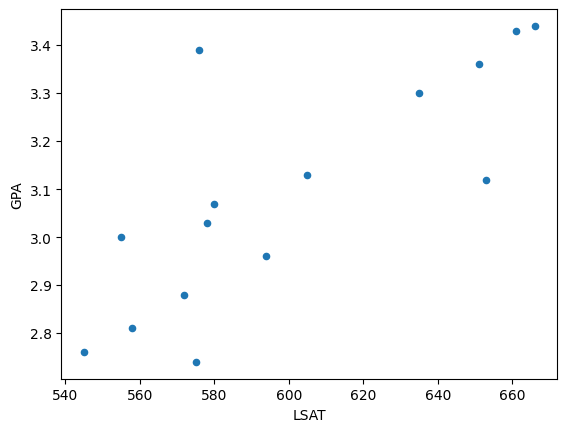

In [2]:
df = pd.read_csv("law.csv")
df.plot.scatter(x="LSAT", y="GPA")
plt.show()

## Identify outliers

In [4]:
# linear regression on df
from sklearn.linear_model import LinearRegression

X = df[["LSAT"]]
y = df["GPA"]
lm = LinearRegression()
lm.fit(X, y);

In [5]:
lm.coef_, lm.intercept_

(array([0.00452348]), 0.3793740867555022)

In [6]:
X = df[["LSAT"]]
y = X * lm.coef_ + lm.intercept_

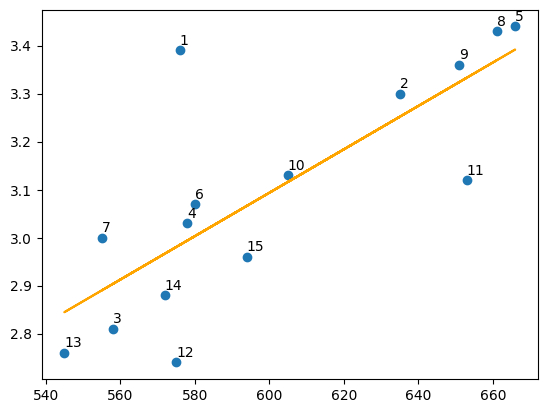

In [7]:
plt.scatter(df["LSAT"], df["GPA"])

for i in range(len(df)):
    datapoint = (df["LSAT"][i], df["GPA"][i])
    plt.annotate(i+1, datapoint, xytext=(datapoint[0], datapoint[1]+0.012))
plt.plot(X, y, color="orange")
plt.show()

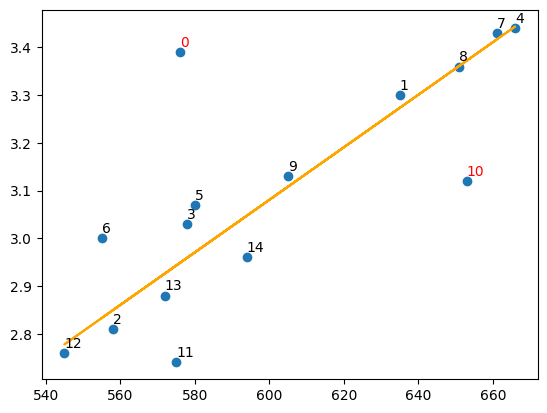

In [8]:
df_rem = df.drop([0, 10])
df_rem

from sklearn.linear_model import LinearRegression

X = df_rem[["LSAT"]]
y = df_rem["GPA"]
lm = LinearRegression()
lm.fit(X, y)

X = df_rem[["LSAT"]]
y = X * lm.coef_ + lm.intercept_

plt.scatter(df["LSAT"], df["GPA"])

for i in range(len(df)):
    datapoint = (df["LSAT"][i], df["GPA"][i])
    if i not in [0, 10]:
        plt.annotate(i, datapoint, xytext=(datapoint[0], datapoint[1]+0.012))
    else:
        plt.annotate(i, datapoint, xytext=(datapoint[0], datapoint[1]+0.012), color="red")
plt.plot(X, y, color="orange")
plt.show()

In [9]:
def bootstrap(data):
    return [random.choice(data) for _ in range(len(data))]

np.array(bootstrap(df.values)).shape, np.stack(bootstrap(df.values), axis=1).shape

((15, 2), (2, 15))

In [12]:
def bootstrap_df(df):
    return pd.DataFrame(bootstrap(df.values), columns=df.columns)

bootstrap_df(df)

,LSAT,GPA
0,594.0,2.96
1,555.0,3.00
2,576.0,3.39
3,545.0,2.76
4,594.0,2.96
5,635.0,3.30
6,575.0,2.74
7,635.0,3.30
8,575.0,2.74
9,572.0,2.88


In [13]:
np.corrcoef(bootstrap_df(df).values.T)

array([[1.       , 0.6217445],
       [0.6217445, 1.       ]])

In [18]:
distribution = [np.corrcoef(bootstrap_df(df).values.T)[0][1] for _ in range(40_000)]

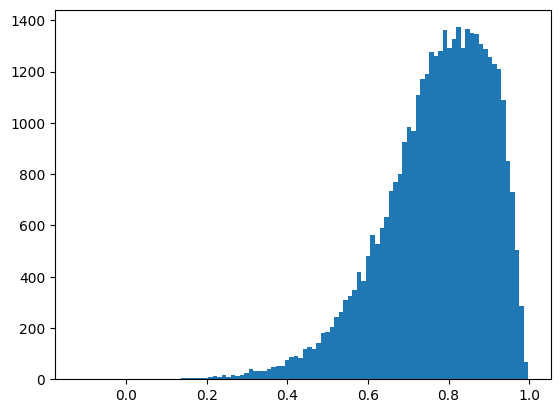

In [19]:
plt.hist(distribution, bins=100)
plt.show()

In this assignment, work on these additional tasks:

## 1. Complete enumeration bootstrap

_Recompute using the complete enumeration bootstrap._

From https://docs.python.org/3/library/itertools.html:

![](img/itertools.png)

In [21]:
from itertools import combinations_with_replacement

n = len(df)
enumeration = list(combinations_with_replacement(list(range(n)), n))
len(enumeration)

0it [00:00, ?it/s]

77558760

```python
data = df.values
corrcoefs = []
for e in tqdm(enumeration):
    c = np.corrcoef(data[list(e)].T)
    corrcoefs.append(c[0][1])
pd.DataFrame(corrcoefs).to_csv("complete_enumeration_corrcoefs.csv", index=False)
```

We run this externally in [`complete_enumeration.py`](complete_enumeration.py). The resulting CSV is of size 1.3 GB, so we do not include it in the repo.

In [20]:
import os

df_path = "complete_enumeration_corrcoefs.csv"
if os.path.exists(df_path):
    complete_enumeration_df = pd.read_csv(df_path)
    fig, ax = plt.subplots()
    complete_enumeration_df.hist(bins=100, alpha=0.5, color="red", ax=ax, label="complete enumeration", density=True)
    ax.hist(distribution, bins=100, alpha=0.5, color="blue", label="bootstrap B = 40 000", density=True)
    ax.legend(loc='upper left')
    plt.savefig("img/complete_enumeration_vs_bootstrap.png")
    plt.close()

![](img/complete_enumeration_vs_bootstrap.png)

## 4. Removals

_Which observation(s) do you need to remove from the sample to make the Monte Carlo and complete enumeration bootstrap look more similar?_

## 5. Monte Carlo vs complete enumeration bootstrap

_Explain why you obtain difference results for Monte Carlo and complete enumeration bootstrap._